In [1]:
#Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Data

books=pd.read_csv('Books.csv')
ratings=pd.read_csv('Ratings.csv')
users=pd.read_csv('Users.csv')

In [3]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [4]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [5]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [6]:
print("Shape of the Books : ",books.shape)
print("Shape of the Ratings : ",ratings.shape)
print("Shape of the Users : ",users.shape)

Shape of the Books :  (271360, 8)
Shape of the Ratings :  (1149780, 3)
Shape of the Users :  (278858, 3)


In [7]:
print("Data Type for Books :\n",books.dtypes)
print("\nData Type for Ratings :\n",ratings.dtypes)
print("\nData Type for Users :\n",users.dtypes)

Data Type for Books :
 ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

Data Type for Ratings :
 User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

Data Type for Users :
 User-ID       int64
Location     object
Age         float64
dtype: object


In [8]:
books[books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [9]:
ratings[ratings.duplicated()]

,User-ID,ISBN,Book-Rating


In [10]:
users[users.duplicated()]

,User-ID,Location,Age


In [16]:
user_rating=pd.merge(users,ratings,on='User-ID')
user_rating.head(2)

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0


In [12]:
user_rating.shape

(1149780, 5)

In [13]:
user_rating.isna().sum()

User-ID             0
Location            0
Age            309492
ISBN                0
Book-Rating         0
dtype: int64

In [15]:
df_inner=pd.merge(user_rating,books,on='ISBN')
df_inner.head(2)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [17]:
df_inner.shape

(1031136, 12)

In [18]:
df_inner.isna().sum()

User-ID                     0
Location                    0
Age                    277835
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
dtype: int64

In [19]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [268]:
df_left=pd.merge(user_rating,books,on='ISBN',how='left')
df_left['ISBN'].tail(5)

1149775    0425163393
1149776    0515087122
1149777    0553275739
1149778    0553578596
1149779    0553579606
Name: ISBN, dtype: object

In [36]:
df_left.shape

(1149780, 12)

In [37]:
df_left.isna().sum()

User-ID                     0
Location                    0
Age                    309492
ISBN                        0
Book-Rating                 0
Book-Title             118644
Book-Author            118645
Year-Of-Publication    118644
Publisher              118646
Image-URL-S            118644
Image-URL-M            118644
Image-URL-L            118648
dtype: int64

In [266]:
missed=df_left[df_left['Book-Title'].isnull()]
missed=missed.reset_index(drop=True)
missed['ISBN'].sort_values().tail(50)

73571      THEALLTRUETRA
98897      THECATASTROPH
74968       THEFLYINGACE
107728      TINACRUZ1001
15020           TM674623
100082     ULLSTEINBUCHN
73689      UNGRANDHOMMED
22487          V16382000
36440         VENAFRO001
86396          VG3862004
33093      WEAREWITNESSE
6832          X000000000
57836         X000000000
9760          X000000000
89976         X113780760
13707         X439361760
56925         X903145730
110716        XXXXXXXXXX
57340         XXXXXXXXXX
21682      XXXXXXXXXXXXX
20978          Y99697115
74969      YOUTELLEM,AND
95562         Z380703475
116088       ZR902CX0093
94892        ZR903CX0003
6833         ZR903CX0003
116089       ZR903CX0003
68482       \0094749809"
1931        \0210000010"
117301      \0432534220"
4377      \0432534220\""
18385     \0432534220\""
86281     \0432534220\""
115455      \0679751521"
4378      \2842053052\""
53719     \2842053052\""
21180     \8804501367\""
91249     \8804520159\""
116776    \8887517452\""
116777    \8888809228\""


In [316]:
missed.shape

(118644, 12)

In [313]:
fixed_isbn=pd.DataFrame(columns=['Index','Wrong_ISBN','Correct_ISBN'])
fixed_isbn

,Index,Wrong_ISBN,Correct_ISBN


In [314]:
%%time
for num in range(len(missed)):
    if not books[books['ISBN'].str.contains(re.sub(r'[^\w\s]', '', missed['ISBN'][num]))].empty:
        fixed_isbn=fixed_isbn.append({'Index':num,'Wrong_ISBN':missed['ISBN'][num],'Correct_ISBN':books[books['ISBN'].str.contains(re.sub(r'[^\w\s]', '', missed['ISBN'][num]))].reset_index().iloc[0].at['ISBN']},ignore_index=True)

Wall time: 4h 57min 48s


In [315]:
#fixed_isbn.to_csv('fixed_isbn.csv',index=False)

In [317]:
fixed_isbn

,Index,Wrong_ISBN,Correct_ISBN
0,0,034542252,034542252X
1,44,20070/88,0822007088
2,54,40052/90,0140052909
3,263,052594527,052594527X
4,563,006440630,006440630X
...,...,...,...
1942,117926,804109729,0804109729
1943,118004,37321944X,037321944X
1944,118351,060803320,0060803320
1945,118582,01420.01740,0142001740


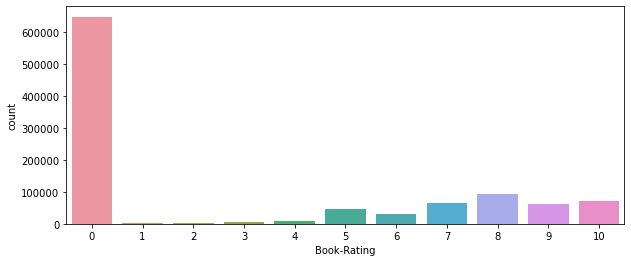

In [325]:
plt.figure(figsize=(10,4))
sns.countplot(df_inner['Book-Rating'])
plt.show()

In [326]:
df_inner['Book-Rating'].value_counts()

0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: Book-Rating, dtype: int64

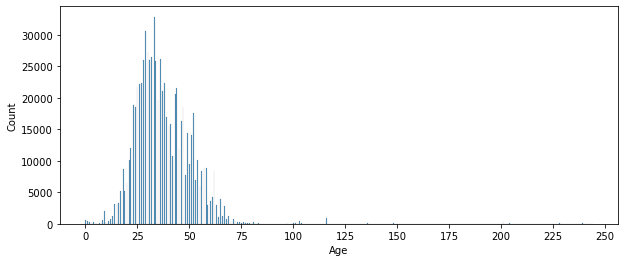

In [327]:
plt.figure(figsize=(10,4))
sns.histplot(df_inner['Age'])
plt.xticks(np.arange(0, 255, step=25))
plt.show()

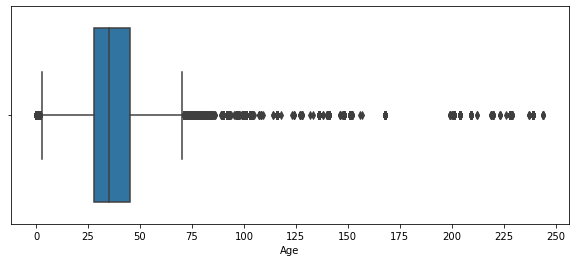

In [328]:
plt.figure(figsize=(10,4))
sns.boxplot(df_inner['Age'])
plt.xticks(np.arange(0, 255, step=25))
plt.show()